In [27]:
import scanpy as sc 
import numpy as np 
import pandas as pd 

In [28]:
adata = sc.read_h5ad('/ix3/djishnu/alw399/SpaceOracle/data/human_lymph_cosmx/seurat.h5ad')
adata

AnnData object with n_obs × n_vars = 1852946 × 6175
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.B', 'Max.B', 'Mean.G', 'Max.G', 'Mean.Y', 'Max.Y', 'Mean.R', 'Max.R', 'Mean.DAPI', 'Max.DAPI', 'SplitRatioToLocal', 'NucArea', 'NucAspectRatio', 'Circularity', 'Eccentricity', 'Perimeter', 'Solidity', 'cell_id', 'X', 'version', 'dualfiles', 'Run_name', 'Run_Tissue_name', 'ISH.concentration', 'Dash', 'tissue', 'Panel', 'assay_type', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantile_0.85', 'fal

In [29]:
adata.obs['fov'].value_counts()

fov
196    6209
33     6203
337    6194
219    6179
316    6178
       ... 
54      259
86      228
28      193
4       128
146      30
Name: count, Length: 400, dtype: int64

In [30]:
adata.obs['cell_type'].value_counts()

cell_type
NA                             295683
B cell 1                       280714
B cell 2                       239712
CD4 T cell                     238906
B cell 3                       183914
fibroblast reticular cell 1    131352
fibroblast reticular cell 2     93335
macrophage                      90253
pericyte                        60624
GC B cell                       57165
CD8 T cell                      40889
interferon-stimulated cell      37415
APC 1                           35454
plasma cell                     30018
NK cell                         25016
epithelial cell                  9060
nonspecific                      2297
APC 2                             785
dendritic cells                   354
Name: count, dtype: int64

In [31]:
counts = {}

for fov in adata.obs['fov'].unique():
    subset = adata[adata.obs['fov'] == fov]
    counts[fov] = subset.obs['cell_type'].value_counts()

ct_counts = pd.DataFrame(counts).T
ct_counts 

cell_type,APC 1,APC 2,B cell 1,B cell 2,B cell 3,CD4 T cell,CD8 T cell,GC B cell,NA,NK cell,dendritic cells,epithelial cell,fibroblast reticular cell 1,fibroblast reticular cell 2,interferon-stimulated cell,macrophage,nonspecific,pericyte,plasma cell
100,245.0,1.0,339.0,175.0,375.0,957.0,164.0,89.0,402.0,113.0,NaN,29.0,476.0,493.0,NaN,355.0,NaN,379.0,34.0
101,208.0,50.0,206.0,40.0,65.0,414.0,72.0,38.0,762.0,70.0,NaN,85.0,241.0,363.0,3.0,211.0,NaN,287.0,303.0
102,4.0,NaN,1906.0,1024.0,683.0,205.0,113.0,91.0,580.0,3.0,NaN,1.0,487.0,102.0,2.0,123.0,NaN,144.0,9.0
103,1.0,NaN,1625.0,614.0,244.0,151.0,66.0,134.0,1050.0,1.0,NaN,NaN,174.0,47.0,NaN,68.0,1.0,120.0,9.0
104,30.0,NaN,218.0,23.0,7.0,241.0,38.0,27.0,280.0,29.0,NaN,3.0,109.0,126.0,NaN,32.0,NaN,39.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,119.0,NaN,213.0,1087.0,999.0,497.0,125.0,85.0,237.0,47.0,NaN,26.0,684.0,312.0,NaN,478.0,NaN,222.0,8.0
97,19.0,NaN,228.0,2510.0,961.0,167.0,72.0,257.0,246.0,14.0,NaN,2.0,359.0,113.0,NaN,191.0,NaN,180.0,10.0
98,177.0,NaN,183.0,603.0,521.0,1194.0,132.0,154.0,281.0,80.0,NaN,54.0,327.0,601.0,3.0,440.0,NaN,125.0,29.0
99,17.0,NaN,682.0,768.0,1224.0,567.0,129.0,113.0,341.0,5.0,NaN,NaN,710.0,180.0,7.0,356.0,NaN,157.0,4.0


In [32]:
ct_counts.sort_values(by='GC B cell', ascending=False).head(20)

cell_type,APC 1,APC 2,B cell 1,B cell 2,B cell 3,CD4 T cell,CD8 T cell,GC B cell,NA,NK cell,dendritic cells,epithelial cell,fibroblast reticular cell 1,fibroblast reticular cell 2,interferon-stimulated cell,macrophage,nonspecific,pericyte,plasma cell
309,6.0,NaN,2567.0,349.0,45.0,189.0,39.0,746.0,592.0,NaN,NaN,NaN,118.0,62.0,NaN,72.0,NaN,135.0,26.0
261,4.0,NaN,2778.0,185.0,43.0,183.0,43.0,647.0,617.0,1.0,NaN,NaN,225.0,46.0,1.0,39.0,NaN,77.0,7.0
357,11.0,NaN,2651.0,117.0,3.0,258.0,37.0,614.0,1263.0,6.0,NaN,1.0,92.0,53.0,5.0,19.0,NaN,70.0,10.0
244,25.0,NaN,7.0,1311.0,1540.0,319.0,131.0,590.0,317.0,16.0,NaN,3.0,459.0,170.0,7.0,437.0,NaN,202.0,8.0
81,21.0,NaN,322.0,1890.0,847.0,356.0,123.0,563.0,213.0,8.0,NaN,9.0,405.0,142.0,NaN,268.0,NaN,85.0,2.0
204,34.0,NaN,1734.0,622.0,252.0,525.0,109.0,542.0,525.0,20.0,NaN,3.0,431.0,255.0,4.0,118.0,NaN,148.0,5.0
354,14.0,NaN,2528.0,108.0,17.0,297.0,55.0,510.0,700.0,22.0,NaN,2.0,188.0,71.0,99.0,48.0,NaN,102.0,9.0
66,1.0,NaN,198.0,2235.0,797.0,284.0,147.0,493.0,215.0,NaN,NaN,NaN,349.0,81.0,NaN,270.0,NaN,180.0,9.0
180,1.0,NaN,2380.0,1111.0,302.0,232.0,66.0,424.0,560.0,NaN,NaN,NaN,242.0,60.0,2.0,77.0,NaN,83.0,5.0
271,17.0,NaN,68.0,1854.0,1237.0,338.0,155.0,401.0,308.0,1.0,NaN,NaN,414.0,65.0,NaN,257.0,NaN,137.0,4.0


In [33]:
fov = 244

In [34]:
subset = adata[adata.obs['fov'] == fov]
subset

View of AnnData object with n_obs × n_vars = 5542 × 6175
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.B', 'Max.B', 'Mean.G', 'Max.G', 'Mean.Y', 'Max.Y', 'Mean.R', 'Max.R', 'Mean.DAPI', 'Max.DAPI', 'SplitRatioToLocal', 'NucArea', 'NucAspectRatio', 'Circularity', 'Eccentricity', 'Perimeter', 'Solidity', 'cell_id', 'X', 'version', 'dualfiles', 'Run_name', 'Run_Tissue_name', 'ISH.concentration', 'Dash', 'tissue', 'Panel', 'assay_type', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantile_0.85',

In [35]:
subset = subset[~(subset.obs['cell_type'] == 'NA')]
subset.obs['cell_type'].value_counts()

cell_type
B cell 3                       1540
B cell 2                       1311
GC B cell                       590
fibroblast reticular cell 1     459
macrophage                      437
CD4 T cell                      319
pericyte                        202
fibroblast reticular cell 2     170
CD8 T cell                      131
APC 1                            25
NK cell                          16
plasma cell                       8
B cell 1                          7
interferon-stimulated cell        7
epithelial cell                   3
Name: count, dtype: int64

In [36]:
tonsil = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/snrna_human_tonsil.h5ad')
tonsil.obs['cell_type'].value_counts()

cell_type
B_germinal_center      1848
B_naive                1067
T_CD4                   779
B_memory                516
T_follicular_helper     294
plasma                  262
FDC                     255
T_CD8                   238
NK                      170
mDC                     137
myeloid                 102
pDC                      64
T_double_neg             46
Name: count, dtype: int64

In [37]:
shared_genes = set(subset.var_names) & set(tonsil.var_names)
len(shared_genes)

1495

In [ ]:
subset.obsm['spatial'] = subset.obs[['x_slide_mm', 'y_slide_mm']].values
sc.pl.spatial(subset, color=['cell_type', 'FOXO1', 'PAX5'], spot_size=0.006)

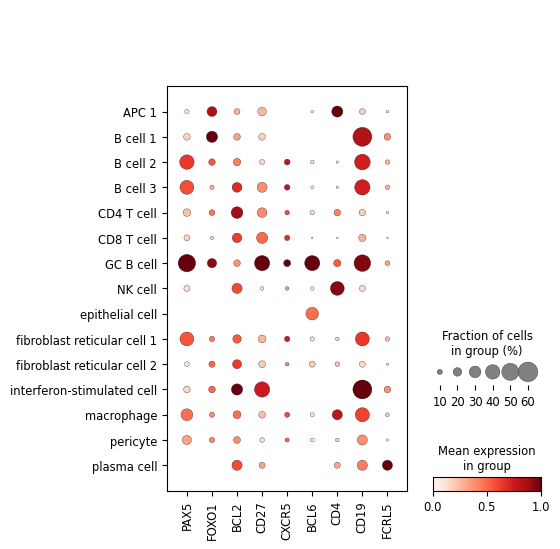

In [58]:
marker_genes = [
    'PAX5', 'FOXO1', 
    'BCL2', # naive
    'CD27', # memory
    'CXCR5', 'BCL6', # Tfh
    'CD4',
    'CD19' # B
]
sc.pl.dotplot(
    subset,
    standard_scale='var',
    var_names=marker_genes,
    groupby='cell_type'
)

In [40]:
cd4s = subset[subset.obs['cell_type'] == 'CD4 T cell']
cd4s

View of AnnData object with n_obs × n_vars = 319 × 6175
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.B', 'Max.B', 'Mean.G', 'Max.G', 'Mean.Y', 'Max.Y', 'Mean.R', 'Max.R', 'Mean.DAPI', 'Max.DAPI', 'SplitRatioToLocal', 'NucArea', 'NucAspectRatio', 'Circularity', 'Eccentricity', 'Perimeter', 'Solidity', 'cell_id', 'X', 'version', 'dualfiles', 'Run_name', 'Run_Tissue_name', 'ISH.concentration', 'Dash', 'tissue', 'Panel', 'assay_type', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantile_0.85', 

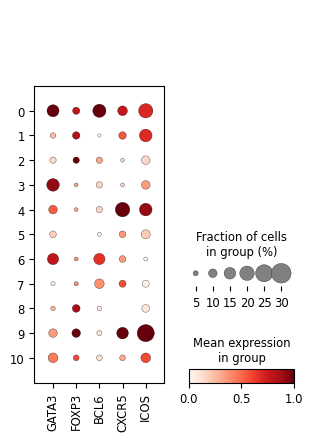

In [48]:
sc.pp.neighbors(cd4s, n_neighbors=3)
sc.tl.umap(cd4s)
# sc.tl.leiden(cd4s, resolution=0.01)
sc.tl.leiden(cd4s, resolution=0.8)

sc.pl.dotplot(
    cd4s,
    standard_scale='var',
    var_names=['GATA3', 'FOXP3', 'BCL6', 'CXCR5', 'ICOS'],
    groupby='leiden'
)

In [50]:
# tfh = cd4s[cd4s.obs['leiden'] == '1'].obs_names
tfh = cd4s[cd4s.obs['leiden'] == '0'].obs_names
len(tfh)

51

In [59]:
mapping = {
    'B cell 1': 'B_naive',
    'GC B cell': 'B_germinal_center',
    'B cell 2': 'B_naive',
    'CD4 T cell': 'T_CD4',
    'pericyte': 'unmapped',
    'fibroblast reticular cell 1': 'unmapped',
    'macrophage': 'myeloid',
    'fibroblast reticular cell 2': 'unmapped',
    'B cell 3': 'B_memory',
    'CD8 T cell': 'T_CD8',
    'plasma cell': 'plasma',
    'APC': 'mDC',
    'APC 1': 'mDC',
    'epithelial cell': 'unmapped',
    'NK cell': 'NK',
    'interferon-stimulated cell': 'B_memory'
}

In [65]:
subset.obs['cell_type_orig'] = subset.obs['cell_type'].copy()
subset.obs['cell_type'] = subset.obs['cell_type'].map(mapping)

subset.obs.loc[tfh, 'cell_type'] = 'Tfh'
subset.obs['cell_type'].value_counts()

cell_type
B_memory             1547
B_naive              1318
unmapped              834
B_germinal_center     590
myeloid               437
T_CD4                 268
T_CD8                 131
Tfh                    51
mDC                    25
NK                     16
plasma                  8
Name: count, dtype: int64

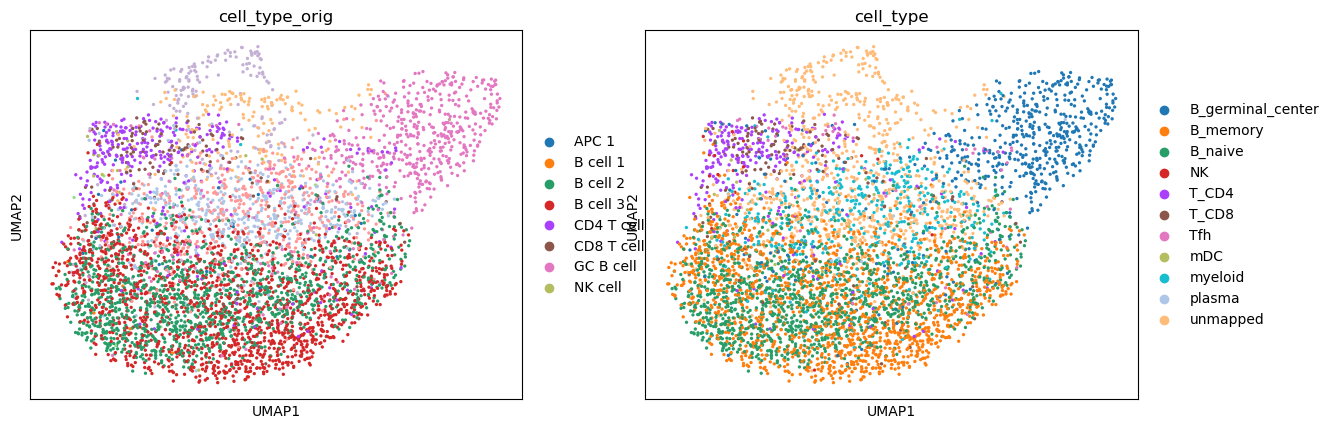

In [75]:
sc.tl.pca(subset, n_comps=50)
sc.pp.neighbors(subset, use_rep='X_pca')
sc.tl.umap(subset, min_dist=0.5, spread=1)
sc.pl.umap(subset, color=['cell_type_orig', 'cell_type'])

In [68]:
import sys 
sys.path.append('../../src')
from spaceoracle.tools.utils import clean_up_adata

clean_up_adata(subset, ['cell_type', 'spatial', 'cell_type_orig'])

In [69]:
subset

AnnData object with n_obs × n_vars = 5225 × 6175
    obs: 'cell_type', 'cell_type_orig'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [70]:
subset.layers['raw_count'] = subset.X.copy()
sc.pp.log1p(subset)
subset.layers['normalized_count'] = subset.X

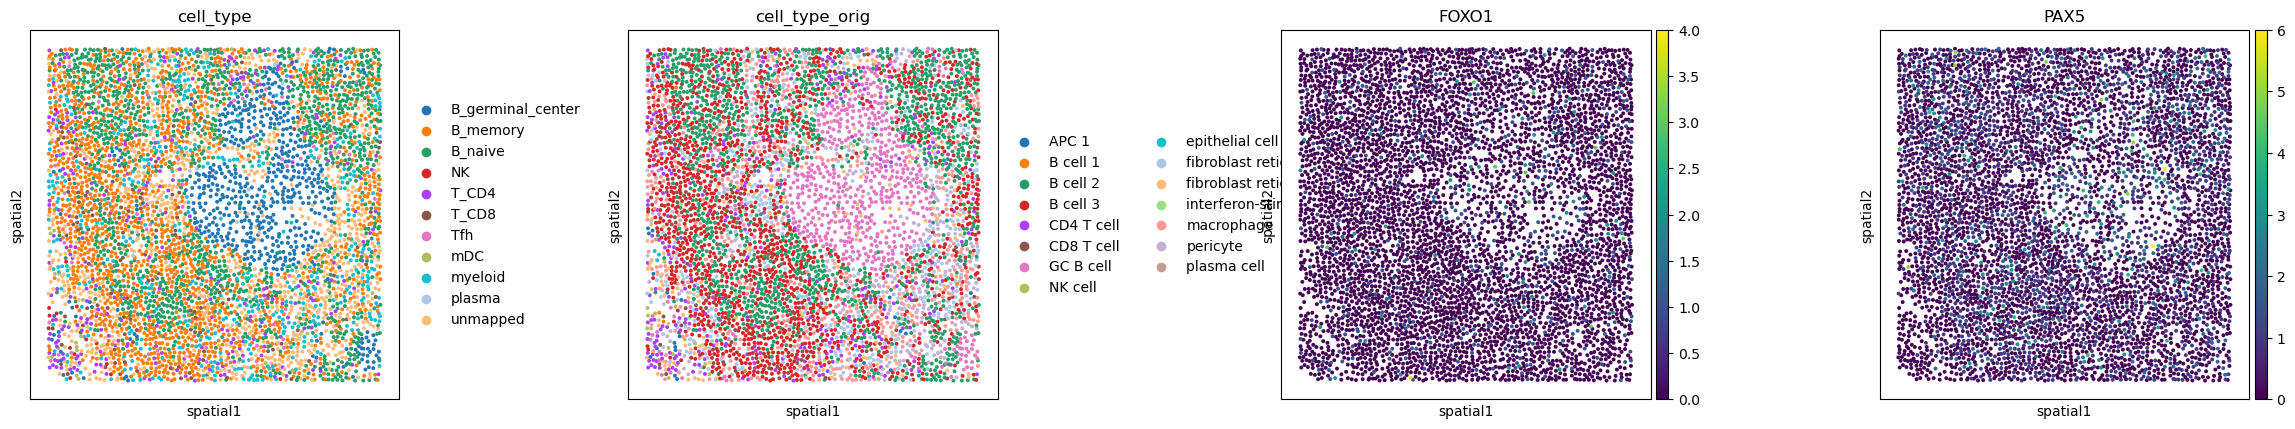

In [71]:
sc.pl.spatial(subset, color=['cell_type', 'cell_type_orig', 'FOXO1', 'PAX5'], spot_size=0.006)

In [76]:
from spaceoracle.tools.utils import scale_adata

subset = scale_adata(subset, cell_size=15)
subset

AnnData object with n_obs × n_vars = 5225 × 6175
    obs: 'cell_type', 'cell_type_orig'
    uns: 'log1p', 'cell_type_colors', 'cell_type_orig_colors', 'pca', 'neighbors', 'umap'
    obsm: 'spatial', 'X_pca', 'X_umap', 'spatial_unscaled'
    varm: 'PCs'
    layers: 'raw_count', 'normalized_count'
    obsp: 'distances', 'connectivities'

In [77]:
subset.write_h5ad(f'/ix/djishnu/shared/djishnu_kor11/training_data_2025/human_lymph_cosmx_{fov}.h5ad')